## Bike Sharing Assignment_UPGRAD

#### prepared and submitted by " Ashwini Pujar "
upGrad Linear Regression Assignment - Build a model for prediction of bike rental daily count based on the environmental and seasonal settings.

In [110]:
# Install required libraries
%pip install pandas matplotlib seaborn scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Dictionary

day.csv have the following fields:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Download & Load Dataset

Data Dictionary is located at, https://drive.google.com/file/d/1x4Vi_FF0DEmTN1Cf6BnPHUuQP9p0s0Pz/view

In [195]:


df_data = pd.read_csv('./Downloads/day.csv', index_col = 'instant')

### Dataset Wrangling

Inspect data types, data size, handle missing values, and more.

In [197]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [199]:
df_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [201]:
print(f"The dataset has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

The dataset has 730 rows and 15 columns.


In [203]:
df_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Missing values could be due to several reasons.
- Human error
- Privacy issues etc

In [121]:
df_data.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values. `Imputation` can be skipped for this dataset.

#### Introduce categorical names
Introdcue categorical description columns for Explorartory Data Analysis - Univariate, Bivariate, Mulitvariate analysis.

In [124]:
# Columns holding numerical data.
NUMERICAL_COLUMNS=['temp','atemp','hum','windspeed']
# Columns holding categorical data.

CATEGORICAL_COLUMNS=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

# Creates category names/description columns for analysis.
category_variable_name_dict = {
   'season': {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'},
   'yr' : {0: '2018', 1: '2019'},
   'mnth': { 1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"},
   'holiday': {0: 'Holiday', 1: 'Not Holiday'},
   'weekday': {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'},
   'workingday': {0: 'Working Day', 1: 'Not Working Day'},
   'weathersit': {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                  3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'}
                  # EXCLUDING as NO RECORDS: 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
}

for category in category_variable_name_dict:
   df_data[category + '_name'] = df_data[category].map(category_variable_name_dict[category])

print(list(df_data.columns))

['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_name', 'yr_name', 'mnth_name', 'holiday_name', 'weekday_name', 'workingday_name', 'weathersit_name']


### Univariate Analysis: Numerical Variables

When dealing with numerical variables, we have to check their properties like:

- Mean
- Median
- Standard Deviation
- Kurtosis/skewness
- distribution/range

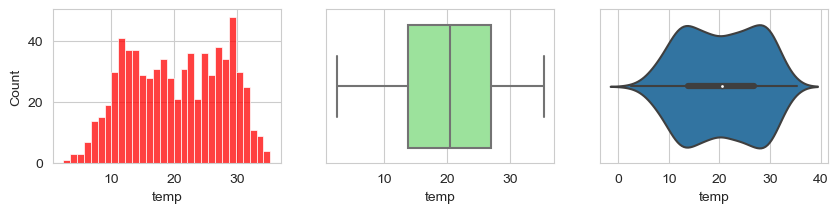

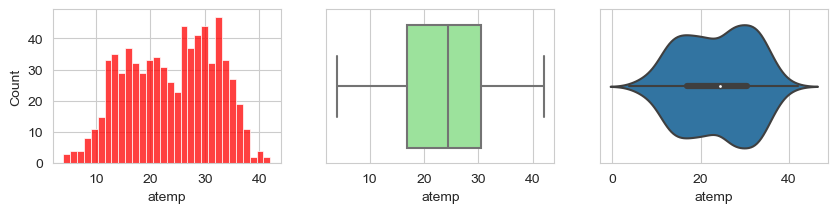

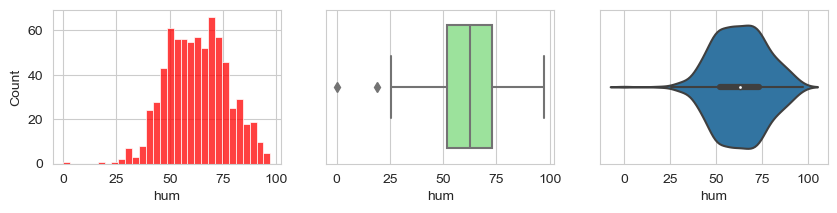

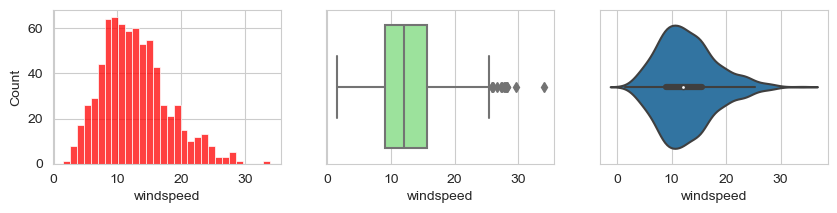

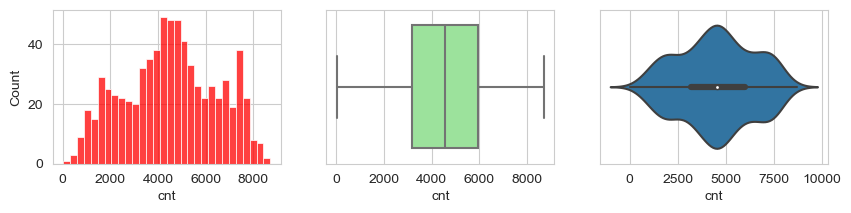

In [126]:
sns.set_style('whitegrid')

for column in NUMERICAL_COLUMNS + ['cnt']:
    fig, axs = plt.subplots(ncols = 3, figsize=(10, 2))
    sns.histplot(df_data, x=column, kde = False, color ='red', bins = 30, ax=axs[0])
    sns.boxplot(df_data, x=column, color ='lightgreen', ax=axs[1])
    sns.violinplot(data=df_data, x=column, ax=axs[2])

#### Univariate Analysis Summary
- `Windspeed` has outliers. Should we remove outliers?

### Univariate Analysis: Categorical Variables

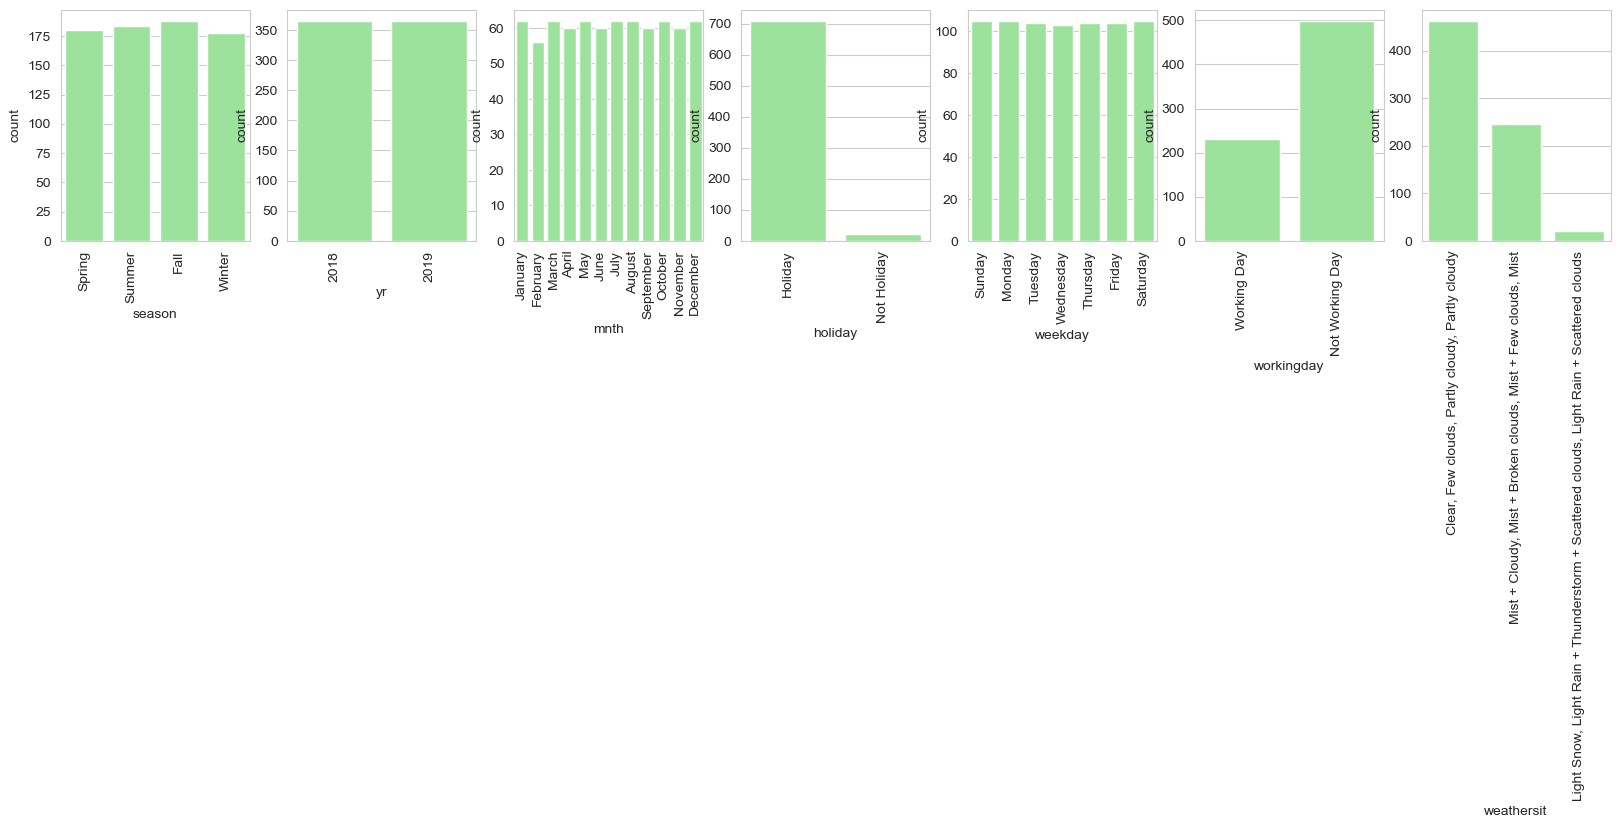

In [129]:
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(ncols = 7, figsize=(20, 3))
for i, column in enumerate(CATEGORICAL_COLUMNS):
    g = sns.countplot(df_data, x=column, color='lightgreen', ax=axs[i])
    g.set_xticklabels(labels=category_variable_name_dict[column].values(), rotation=90)

#### Summary of Univariate Analysis of categorical data
- Holiday
  - Majority of bike hires are on holidays
  - This information matches with `Working day or Not working day`

- Season, Month, Week
  - Consistent bike rents across season, month and week.

- Weather Situation
   - Less bike hires on snowy or rainy days.

### Bivariate Analysis

![Bivariate Analysis](https://miro.medium.com/v2/resize:fit:845/1*P10xcq7lK2VPp0ENwf6ttw.png "Bivariate Analysis")

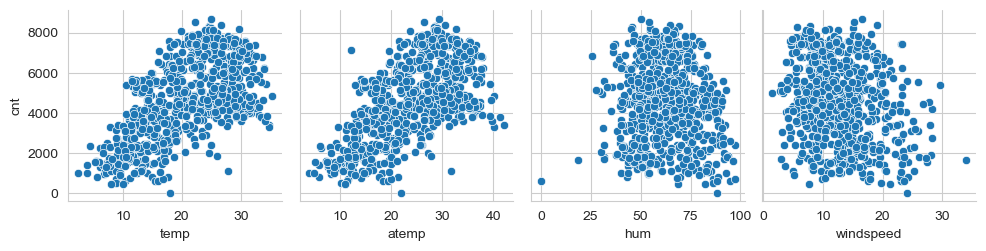

In [132]:
sns.pairplot(data=df_data,
             y_vars=['cnt'],
             x_vars=['temp','atemp','hum','windspeed'])

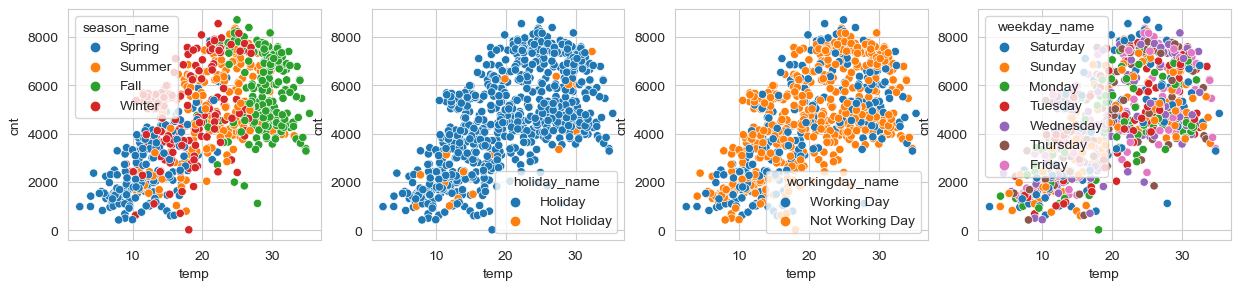

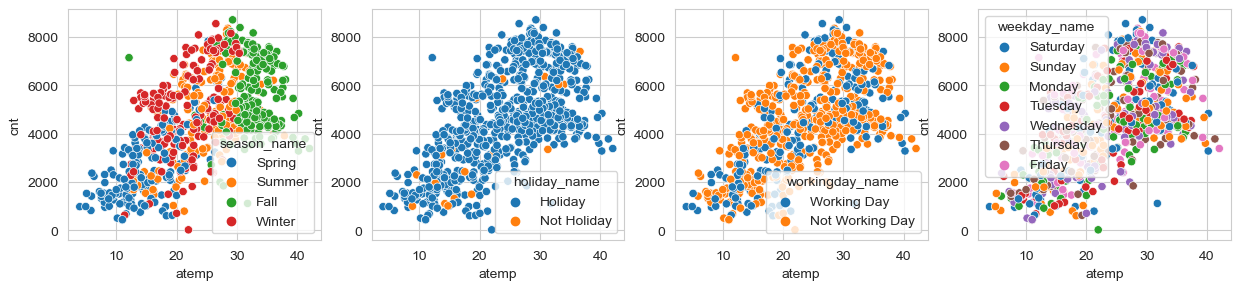

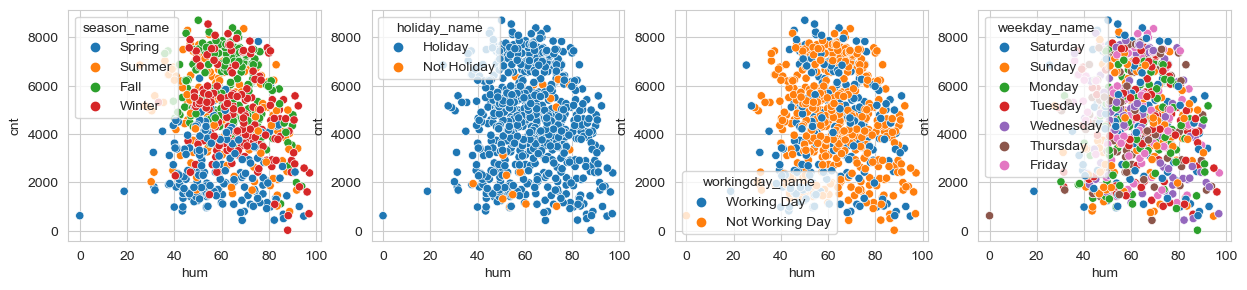

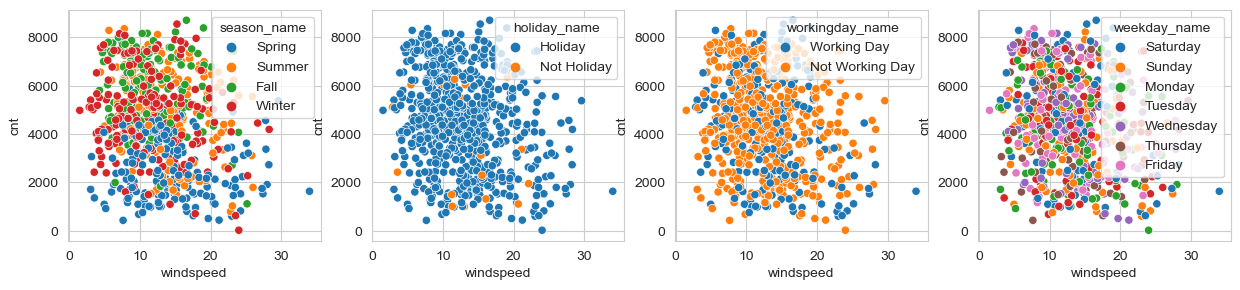

In [133]:
for i, column in enumerate(NUMERICAL_COLUMNS):
    fig, axs = plt.subplots(ncols=4, figsize=(15, 3))
    sns.scatterplot(df_data, x=column, y='cnt',  hue="season_name",  ax=axs[0])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="holiday_name",  ax=axs[1])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="workingday_name",  ax=axs[2])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="weekday_name",  ax=axs[3])

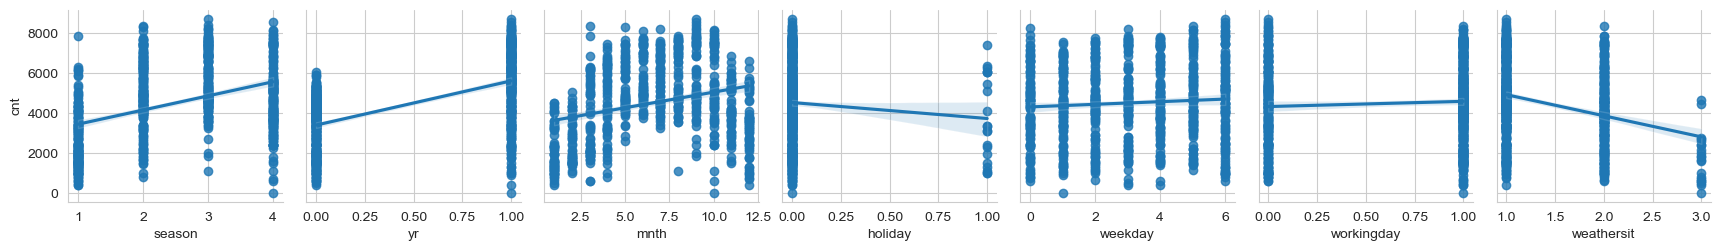

In [134]:
sns.pairplot(data=df_data,
             y_vars=['cnt'],
             x_vars=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit'],
             kind="reg")


### Multicollinearity

Draw Heatmap to check for multicollinearity and relationship between two variables

<Axes: >

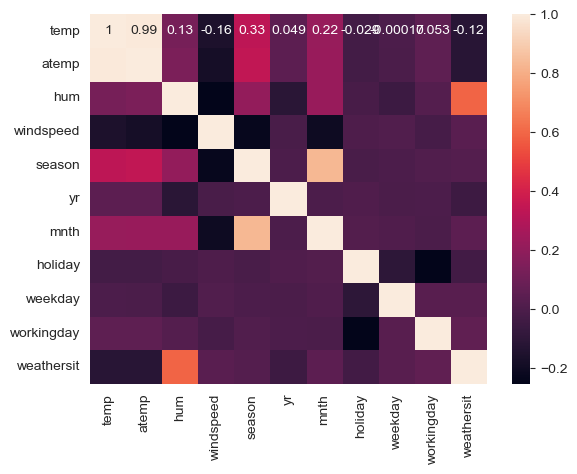

In [136]:
sns.heatmap(df_data[NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True)

#### Feature Engineering

Introdce `Day of Year` feature from `dteday` feature.

In [138]:
df_data['dteday'] = pd.to_datetime(df_data['dteday'], format='%m-%d-%Y', errors='coerce')
df_data['day_of_year'] = df_data['dteday'].dt.dayofyear

#### Scaling & Encoding Categorical Variables

- Standardize numerical features by removing the mean and scaling to unit variance.

- Encode Categorical Variable through `One-hot Encoding`

_Dummy Encoding Vs. One hot encoding_:  One hot encoding utilises N binary variables for N categories in a variable. Dummy encoding uses N-1 features to represent N labels/categories.

Linear regressions behave badly when an n-dimensional input doesn't actually range freely across all n dimensions.

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

column_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['day_of_year', 'yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']),
         ('cat', categorical_transformer, ['season', 'weekday', 'weathersit'])]
    )


#### Feature Selection


In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

y = df_data['cnt']
X = df_data.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

column_transformer.set_output(transform='pandas')

# fit the column transformer to the training data
column_transformer.fit(X_train)

# apply the pipeline to the training and test data
X_train_ = column_transformer.transform(X_train)
X_test_ = column_transformer.transform(X_test)

print(X_train_.head(5))

         num__day_of_year   num__yr  num__mnth  num__holiday  num__workingday  \
instant                                                                         
76               0.041692 -1.013794  -0.983511     -0.167836         0.689019   
36              -0.890083 -1.013794  -1.270123     -0.167836        -1.451338   
266              0.041692 -1.013794   0.736161     -0.167836         0.689019   
167              0.041692 -1.013794  -0.123675     -0.167836         0.689019   
78               0.041692 -1.013794  -0.983511     -0.167836        -1.451338   

         num__temp  num__atemp  num__hum  num__windspeed  cat__season_1  ...  \
instant                                                                  ...   
76       -0.401780   -0.353719 -0.157320        0.255842            1.0  ...   
36       -1.375016   -1.356991  2.189572       -0.379184            1.0  ...   
266       0.638421    0.316781  2.501289       -1.462163            0.0  ...   
167       0.741098    0.755941  

In [143]:
lm = LinearRegression()
lm.fit(X_train_, y_train)
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train_, y_train)

In [144]:
list(zip(X_train_.columns,rfe.support_,rfe.ranking_))

[('num__day_of_year', False, 13),
 ('num__yr', True, 1),
 ('num__mnth', False, 9),
 ('num__holiday', False, 3),
 ('num__workingday', False, 10),
 ('num__temp', True, 1),
 ('num__atemp', False, 7),
 ('num__hum', False, 2),
 ('num__windspeed', True, 1),
 ('cat__season_1', True, 1),
 ('cat__season_2', True, 1),
 ('cat__season_3', False, 12),
 ('cat__season_4', True, 1),
 ('cat__weekday_0', True, 1),
 ('cat__weekday_1', False, 8),
 ('cat__weekday_2', False, 11),
 ('cat__weekday_3', False, 6),
 ('cat__weekday_4', False, 14),
 ('cat__weekday_5', False, 5),
 ('cat__weekday_6', False, 4),
 ('cat__weathersit_1', True, 1),
 ('cat__weathersit_2', True, 1),
 ('cat__weathersit_3', True, 1)]

In [145]:
X_train_.columns[rfe.support_]

Index(['num__yr', 'num__temp', 'num__windspeed', 'cat__season_1',
       'cat__season_2', 'cat__season_4', 'cat__weekday_0', 'cat__weathersit_1',
       'cat__weathersit_2', 'cat__weathersit_3'],
      dtype='object')

In [146]:
X_train_rfe = X_train_[X_train_.columns[rfe.support_]]
X_train_rfe.head()

,num__yr,num__temp,num__windspeed,cat__season_1,cat__season_2,cat__season_4,cat__weekday_0,cat__weathersit_1,cat__weathersit_2,cat__weathersit_3
instant,,,,,,,,,,
76,-1.013794,-0.401780,0.255842,1.0,0.0,0.0,0.0,1.0,0.0,0.0
36,-1.013794,-1.375016,-0.379184,1.0,0.0,0.0,0.0,0.0,1.0,0.0
266,-1.013794,0.638421,-1.462163,0.0,0.0,1.0,0.0,0.0,1.0,0.0
167,-1.013794,0.741098,0.215148,0.0,1.0,0.0,0.0,0.0,1.0,0.0
78,-1.013794,-0.093738,2.332287,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### The variance inflation factor (VIF)

So how do we detect and deal with collinearity? One way is to calculate the variance inflation factor for each feature. The VIF is given by
VIF𝑖=11−𝑅2𝑖

where 𝑅2
is the coefficient of determination. It is generally deemed that a feature that has a VIF value greater than 5 is highly collinear with other features in the data.

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF             = pd.DataFrame()
VIF['feature']  = X_train_.columns
VIF['VIF']      = [variance_inflation_factor(X_train_.values, i) for i in range(X_train_.shape[1])]
# take a look
VIF


,feature,VIF
0,num__day_of_year,1.014218
1,num__yr,1.034339
2,num__mnth,3.624540
3,num__holiday,inf
4,num__workingday,inf
5,num__temp,64.715789
6,num__atemp,61.147519
7,num__hum,1.850899
8,num__windspeed,1.223733
9,cat__season_1,inf


we can see that (unsurprisingly) temp and atemp are both features with extremely high collinearity. Now let us see what happens if we drop the atemp column and recalculate the VIF.

TODO: Not sure `weathersit`, `season`, `holiday` are INF. Need to investigate.

In [150]:
X_train_new = X_train_.drop(['num__atemp'], axis=1)

VIF            = pd.DataFrame()
VIF['feature'] = X_train_new.columns
VIF['VIF']     = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
VIF

,feature,VIF
0,num__day_of_year,1.014215
1,num__yr,1.033685
2,num__mnth,3.623942
3,num__holiday,inf
4,num__workingday,inf
5,num__temp,3.622557
6,num__hum,1.847432
7,num__windspeed,1.167409
8,cat__season_1,inf
9,cat__season_2,inf


### Feature selection by p-value

In [152]:
# TODO

### Build Model

In [154]:
model = LinearRegression()
model.fit(X_train_, y_train)

y_test_pred = model.predict(X_test_)

print("model score: %.3f" % model.score(X_test_, y_test))

model score: 0.786


#### Model evaluaiton metrics

R2 scorr is used as evaluation metric.

In [156]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.785789274248776

In [157]:
print(list(zip(model.coef_, X_train_.columns)))
import numpy as np
coefficients = pd.concat([pd.DataFrame(X_train_.columns, columns=['feature']),pd.DataFrame(np.transpose(model.coef_), columns=['coefficients'])], axis = 1)
print(coefficients.sort_values('coefficients', ascending=False))

[(25.552933389359385, 'num__day_of_year'), (1030.0135130038093, 'num__yr'), (-68.20918392024113, 'num__mnth'), (-130.19743626159357, 'num__holiday'), (41.36751237954356, 'num__workingday'), (841.0542127774421, 'num__temp'), (102.01245730173046, 'num__atemp'), (-162.27611696814554, 'num__hum'), (-192.5816832793443, 'num__windspeed'), (-931.6007795600707, 'cat__season_1'), (222.25583499274376, 'cat__season_2'), (-27.191831430920274, 'cat__season_3'), (736.5367759982465, 'cat__season_4'), (-226.16112488789594, 'cat__weekday_0'), (-110.18224765386293, 'cat__weekday_1'), (-39.87925500192474, 'cat__weekday_2'), (75.6597034389932, 'cat__weekday_3'), (-10.933463089834188, 'cat__weekday_4'), (83.40947493775893, 'cat__weekday_5'), (228.08691225676554, 'cat__weekday_6'), (760.9817340510587, 'cat__weathersit_1'), (303.04690006106085, 'cat__weathersit_2'), (-1064.028634112119, 'cat__weathersit_3')]
              feature  coefficients
1             num__yr   1030.013513
5           num__temp    841.